In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

x = np.array([0, 0.1, 2,4])
y = np.array([4, 0.9, 3.6, 5])

In [ ]:
Kx  = np.exp(-0.5*np.array([(x-xi)**2 for xi in x]))
Kx

array([[1.00000000e+00, 9.95012479e-01, 1.35335283e-01, 3.35462628e-04],
       [9.95012479e-01, 1.00000000e+00, 1.64474457e-01, 4.97955422e-04],
       [1.35335283e-01, 1.64474457e-01, 1.00000000e+00, 1.35335283e-01],
       [3.35462628e-04, 4.97955422e-04, 1.35335283e-01, 1.00000000e+00]])

In [ ]:
fx = np.random.multivariate_normal(np.zeros_like(x), Kx, 10)
fx

array([[-0.92582985, -0.96982037, -0.65567501,  0.74876834],
       [ 0.56146437,  0.4754372 , -0.51600972, -1.25449091],
       [ 0.02526889,  0.01133458,  0.57948079, -0.37820203],
       [ 0.98472906,  1.07406752,  0.91670229,  0.38907842],
       [ 0.67681169,  0.69681899,  1.33751387,  0.12168377],
       [ 0.51448071,  0.38809329,  0.75713903,  0.68746041],
       [-0.66059644, -0.69118146,  0.21917817,  0.67185835],
       [-2.3272234 , -2.23220115,  0.43626996,  1.61883051],
       [ 0.29146018,  0.47797712,  0.8552593 , -0.68279038],
       [-0.04293257, -0.06266979, -0.72147859, -1.27294328]])

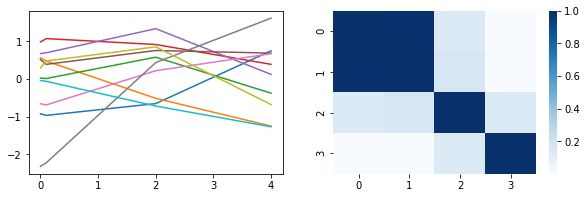

In [ ]:
_,ax, = plt.subplots(1,2, figsize = (10,3))
ax[0].plot(x,fx.T)
sns.heatmap(data=Kx, cmap= 'Blues', ax=ax[1])
plt.show()

Visual representation of calculating the GP posterior mean and covariance given
the example points from  Lighter colours indicate higher values. For the posterior
mean, the covariance between all observed points is multiplied by the inverse of the sum of
the covariance of the observed points and the noise matrix, as well as by the observations
of the dependent variable

In [ ]:
Ky  = np.exp(-0.5*np.array([(y-yi)**2 for yi in y]))
Ky

array([[1.00000000e+00, 8.18870101e-03, 9.23116346e-01, 6.06530660e-01],
       [8.18870101e-03, 1.00000000e+00, 2.61214099e-02, 2.23745794e-04],
       [9.23116346e-01, 2.61214099e-02, 1.00000000e+00, 3.75311099e-01],
       [6.06530660e-01, 2.23745794e-04, 3.75311099e-01, 1.00000000e+00]])

In [ ]:
fy = np.random.multivariate_normal(np.zeros_like(y), Ky, 10)
fy

array([[-2.61123549, -0.49012257, -3.23302514, -0.42607405],
       [-0.70243967, -0.89592481, -1.01850267,  0.98949009],
       [ 1.61742619, -0.31601711,  1.62066903,  1.67878757],
       [-1.26624406,  0.6240937 , -1.18891685, -2.32825816],
       [ 0.91479646,  0.91707525,  1.12657804,  0.27924768],
       [ 0.24500185,  0.81143357,  0.21432626,  1.10823832],
       [-0.73214929,  1.32249039, -0.49850396, -0.93032681],
       [ 0.96324936,  1.46517111,  1.78717891,  0.10707696],
       [-1.15689398,  0.15689828, -1.41065359,  0.67468123],
       [ 0.08789625, -1.49854132,  0.14134468, -0.13834544]])

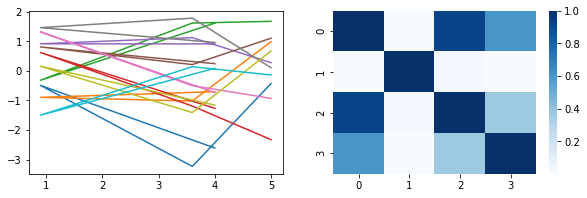

In [ ]:
_,ax, = plt.subplots(1,2, figsize = (10,3))
ax[0].plot(y,fy.T)
sns.heatmap(data=Ky, cmap= 'Blues', ax=ax[1])
plt.show()

Visual representation of calculating the GP posterior mean and covariance given
the example points from  Lighter colours indicate higher values. For the posterior
mean, the covariance between all observed points is multiplied by the inverse of the sum of
the covariance of the observed points and the noise matrix, as well as by the observations
of the dependent variable

# Predictions

In [ ]:
xp = np.array([0, 0.1, 2,4])

In [ ]:
Kxp = np.exp(-0.5*np.array([(x-xi)**2 for xi in xp]))

In [ ]:
x_st = 2

In [ ]:
x_s = np.r_[xp, x_st]

In [ ]:
KKx = np.exp(-0.5*np.array([(x_s-xi)**2 for xi in x_s]))
KKx

array([[1.00000000e+00, 9.95012479e-01, 1.35335283e-01, 3.35462628e-04,
        1.35335283e-01],
       [9.95012479e-01, 1.00000000e+00, 1.64474457e-01, 4.97955422e-04,
        1.64474457e-01],
       [1.35335283e-01, 1.64474457e-01, 1.00000000e+00, 1.35335283e-01,
        1.00000000e+00],
       [3.35462628e-04, 4.97955422e-04, 1.35335283e-01, 1.00000000e+00,
        1.35335283e-01],
       [1.35335283e-01, 1.64474457e-01, 1.00000000e+00, 1.35335283e-01,
        1.00000000e+00]])

In [ ]:
K_st = KKx[-1][:4]
K_st_st = KKx[KKx.shape[0]-1, KKx.shape[1]-1]

In [ ]:
K_st.reshape(-1,4).dot(np.linalg.inv(Kxp)).dot(xp)

array([2.])

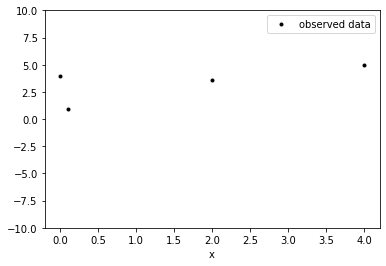

In [ ]:
plt.plot(x,y,'ok', ms=3, alpha=1.0, label='observed data');

plt.xlabel("x"); 
plt.ylim([-10,10]);
plt.legend();
plt.show()